In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uci breast cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.drop(['id','Unnamed: 32'], axis = 'columns')

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

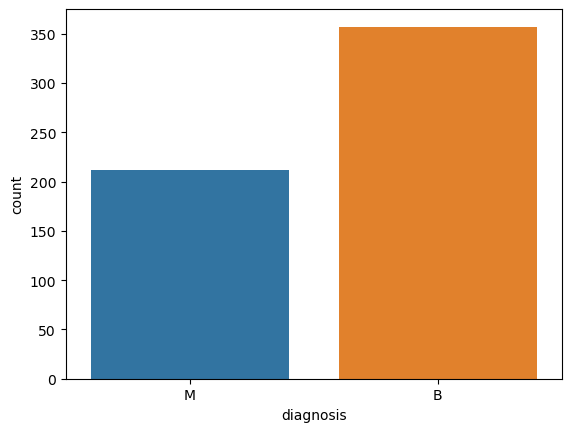

In [ ]:
sns.countplot(x='diagnosis',data=df)

In [ ]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

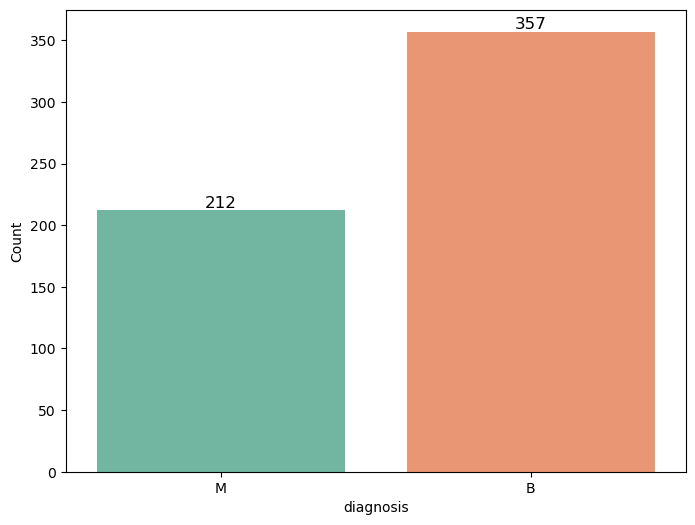

In [ ]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='Set2')

# Annotate the bars with their respective counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

# Optionally, you can set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
x = df.drop('diagnosis',axis=1)

In [ ]:
y = df[['diagnosis']]

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, test_size=.30)

In [ ]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
69,B
542,B
176,B
501,M


In [ ]:
ytest.shape

(171, 1)

In [ ]:
xtest.shape

(171, 30)

# Step 3: Decision Tree model and evaluation

In [ ]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(xtrain, ytrain)
y_pred_dt = dt_model.predict(xtest)

In [ ]:
y_pred_dt

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluate Decision Tree model performance

In [ ]:
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_dt))

Decision Tree Model Performance:
Accuracy: 0.935672514619883 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.94      0.95       108
           M       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



# Step 4: Random Forest model and evaluation

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain)
y_pred_rf = rf_model.predict(xtest)

In [ ]:
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluate Random Forest model performance

In [ ]:
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.9707602339181286 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Pre - Pruning for Cost Complexity

# Initialized Hyperparameters

In [ ]:
# Define hyperparameters for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,810],
    'min_samples_leaf': [1, 2,3, 4]
}

#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [101, 151, 201, 251, 301], #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,810],
    'min_samples_leaf': [1, 2,3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [ ]:
# Perform Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_params, cv=5)
dt_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 15, 20, 25, 28],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 810],
                         'splitter': ['best', 'random']})

In [ ]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.00747094, 0.00211186, 0.00732298, ..., 0.00220828, 0.00160632,
        0.00190563]),
 'std_fit_time': array([0.00081645, 0.00019861, 0.00067926, ..., 0.00051186, 0.00048832,
        0.00066458]),
 'mean_score_time': array([0.0027144 , 0.00210586, 0.00280714, ..., 0.00210819, 0.00190592,
        0.00190458]),
 'std_score_time': array([0.00050863, 0.00020116, 0.00040102, ..., 0.00049454, 0.00066437,
        0.00019984]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 28, 28, 28],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 4, 4, 4],
              mask=[False, False, False, ..

In [ ]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007471,0.000816,0.002714,0.000509,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,742
1,0.002112,0.000199,0.002106,0.000201,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,178
2,0.007323,0.000679,0.002807,0.000401,gini,None,1,3,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,742
3,0.002205,0.000402,0.002412,0.000377,gini,None,1,3,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9500,0.9000,0.9625,0.924051,0.949367,0.937184,0.022400,7
4,0.007376,0.000955,0.002912,0.000588,gini,None,1,4,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.924051,0.912152,0.017321,680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0.002106,0.000202,0.002510,0.000445,entropy,28,4,6,random,"{'criterion': 'entropy', 'max_depth': 28, 'min...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,269
1116,0.006918,0.000924,0.002407,0.000491,entropy,28,4,7,best,"{'criterion': 'entropy', 'max_depth': 28, 'min...",0.9500,0.8875,0.9625,0.949367,0.924051,0.934684,0.026696,21
1117,0.002208,0.000512,0.002108,0.000495,entropy,28,4,7,random,"{'criterion': 'entropy', 'max_depth': 28, 'min...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,269
1118,0.001606,0.000488,0.001906,0.000664,entropy,28,4,810,best,"{'criterion': 'entropy', 'max_depth': 28, 'min...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,961


In [ ]:
tuning_result_dt_gs.shape

(1120, 18)

In [ ]:
dt_grid_search.best_params_ #clf = dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
tuning_result_dt_gs.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
696,0.006929,0.001022,0.002206,0.000402,entropy,4,2,7,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9,0.9750,0.949367,0.936709,0.939715,0.024205,1
694,0.006729,0.000685,0.002205,0.000401,entropy,4,2,6,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9,0.9750,0.949367,0.936709,0.939715,0.024205,1
692,0.007236,0.000509,0.002213,0.000409,entropy,4,2,5,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9,0.9750,0.949367,0.936709,0.939715,0.024205,1
690,0.007023,0.000448,0.002486,0.000603,entropy,4,2,4,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9,0.9750,0.949367,0.936709,0.939715,0.024205,1
688,0.006724,0.000517,0.003014,0.000634,entropy,4,2,3,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9,0.9750,0.949367,0.936709,0.939715,0.024205,1
686,0.006935,0.000732,0.002296,0.000398,entropy,4,2,2,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9,0.9750,0.949367,0.936709,0.939715,0.024205,1
451,0.002306,0.000597,0.002207,0.000403,gini,25,1,3,random,"{'criterion': 'gini', 'max_depth': 25, 'min_sa...",0.9500,0.9,0.9625,0.924051,0.949367,0.937184,0.022400,7
225,0.002708,0.000400,0.001705,0.000399,gini,8,1,2,random,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.9500,0.9,0.9625,0.911392,0.962025,0.937184,0.026344,7
339,0.002407,0.000491,0.002006,0.000316,gini,15,1,3,random,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.9500,0.9,0.9625,0.924051,0.949367,0.937184,0.022400,7
283,0.002206,0.000510,0.002007,0.000004,gini,10,1,3,random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.9500,0.9,0.9625,0.924051,0.949367,0.937184,0.022400,7


# Perform Grid Search for Random Forest

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_params, cv=5)
rf_grid_search.fit(xtrain, ytrain)

# Evaluate the optimized models

In [ ]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))


Decision Tree Grid Search Performance:
Accuracy: 0.9532163742690059
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.96       108
           M       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



# Random Forest Grid Search
y_pred_rf_gs = rf_grid_search.predict(xtest)
print("\nRandom Forest Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_gs))


# Hyperparameter optimization using Randomized Search

In [ ]:
# Perform Randomized Search for Decision Tree
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                      param_distributions=dt_params, n_iter=100, cv=5, random_state=42)
dt_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 15,
                                                      20, 25, 28],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              810],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [ ]:
dt_random_search.cv_results_

{'mean_fit_time': array([0.0025805 , 0.00220633, 0.00235071, 0.00245318, 0.00736632,
        0.00205569, 0.00530429, 0.00210795, 0.00684352, 0.00745659,
        0.00170817, 0.00401082, 0.00683131, 0.00249238, 0.0021637 ,
        0.00540414, 0.00174446, 0.00728583, 0.00256505, 0.00234675,
        0.00122061, 0.00201068, 0.00213327, 0.0041224 , 0.00207019,
        0.00253072, 0.00252562, 0.00683866, 0.00206304, 0.00620756,
        0.00247111, 0.00222001, 0.00206084, 0.00178862, 0.00683846,
        0.00450583, 0.00188942, 0.00698733, 0.00180697, 0.0017302 ,
        0.0019022 , 0.00151844, 0.00212116, 0.00212874, 0.00623965,
        0.0073422 , 0.00204597, 0.00230799, 0.00162807, 0.00174952,
        0.00672407, 0.00180569, 0.00693965, 0.00191097, 0.00213695,
        0.00641918, 0.00671921, 0.00432959, 0.00211954, 0.00660672,
        0.00653501, 0.00197535, 0.00232882, 0.00703063, 0.00676813,
        0.0023304 , 0.0049396 , 0.00203176, 0.00184035, 0.00298281,
        0.00676017, 0.00234466,

In [ ]:
tuning_result_dt_rs = pd.DataFrame(dt_random_search.cv_results_)
tuning_result_dt_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002580,0.000711,0.002248,0.000383,random,4,2,8,gini,"{'splitter': 'random', 'min_samples_split': 4,...",0.8750,0.8750,0.9625,0.936709,0.911392,0.912120,0.034348,59
1,0.002206,0.000404,0.002025,0.000326,random,3,4,2,gini,"{'splitter': 'random', 'min_samples_split': 3,...",0.9125,0.8375,0.9500,0.886076,0.924051,0.902025,0.038247,74
2,0.002351,0.000401,0.002054,0.000044,random,7,1,20,entropy,"{'splitter': 'random', 'min_samples_split': 7,...",0.9375,0.8875,0.9625,0.949367,0.886076,0.924589,0.031865,34
3,0.002453,0.000610,0.002197,0.000201,random,7,4,25,entropy,"{'splitter': 'random', 'min_samples_split': 7,...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,14
4,0.007366,0.000862,0.002724,0.000405,best,4,2,28,gini,"{'splitter': 'best', 'min_samples_split': 4, '...",0.9125,0.9125,0.9250,0.949367,0.886076,0.917089,0.020535,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002007,0.000547,0.001918,0.000207,best,810,1,10,gini,"{'splitter': 'best', 'min_samples_split': 810,...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,88
96,0.006500,0.000513,0.002409,0.000489,best,4,2,20,entropy,"{'splitter': 'best', 'min_samples_split': 4, '...",0.9500,0.9000,0.9500,0.936709,0.936709,0.934684,0.018332,2
97,0.006797,0.000748,0.002415,0.000491,best,7,2,6,gini,"{'splitter': 'best', 'min_samples_split': 7, '...",0.9375,0.9000,0.9375,0.949367,0.924051,0.929684,0.016867,11
98,0.002015,0.000318,0.002013,0.000011,random,7,4,6,entropy,"{'splitter': 'random', 'min_samples_split': 7,...",0.9000,0.8750,0.9125,0.949367,0.860759,0.899525,0.030845,78


In [ ]:
dt_random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 4,
 'criterion': 'entropy'}

# Perform Randomized Search for Random Forest

In [ ]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params, n_iter=100, cv=5, random_state=42)
rf_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 15,
                                                      20, 25, 28],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              810],
                                        'n_estimators': [101, 151, 201, 251,
                                                         301]},
                   random_state=42)

In [ ]:
rf_random_search.cv_results_
tuning_result_rf_rs = pd.DataFrame(rf_random_search.cv_results_)
tuning_result_rf_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000503,0.000636,0.000000,0.000000,251,810,1,auto,None,gini,"{'n_estimators': 251, 'min_samples_split': 810...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
1,0.109163,0.001955,0.011809,0.000679,151,810,3,sqrt,4,entropy,"{'n_estimators': 151, 'min_samples_split': 810...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,57
2,0.222865,0.002385,0.015293,0.000240,201,4,1,log2,2,entropy,"{'n_estimators': 201, 'min_samples_split': 4, ...",0.9375,0.9375,0.9375,0.936709,0.924051,0.934652,0.005309,52
3,0.324340,0.006909,0.019400,0.000630,251,3,3,log2,20,gini,"{'n_estimators': 251, 'min_samples_split': 3, ...",0.9500,0.9500,0.9625,0.936709,0.949367,0.949715,0.008160,15
4,0.000401,0.000491,0.000000,0.000000,151,810,4,auto,2,entropy,"{'n_estimators': 151, 'min_samples_split': 810...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.200335,0.005308,0.012760,0.000488,151,4,1,log2,28,gini,"{'n_estimators': 151, 'min_samples_split': 4, ...",0.9375,0.9500,0.9625,0.936709,0.924051,0.942152,0.013073,50
96,0.254144,0.010540,0.015689,0.000545,201,3,2,log2,28,gini,"{'n_estimators': 201, 'min_samples_split': 3, ...",0.9375,0.9500,0.9625,0.936709,0.949367,0.947215,0.009495,28
97,0.216652,0.006515,0.021215,0.000703,301,810,1,sqrt,20,gini,"{'n_estimators': 301, 'min_samples_split': 810...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,57
98,0.000201,0.000402,0.000000,0.000000,201,7,2,auto,15,entropy,"{'n_estimators': 201, 'min_samples_split': 7, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,68


In [ ]:
rf_random_search.best_params_

{'n_estimators': 201,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'gini'}

# Evaluate the optimized models for Randomized Search

# Decision Tree Randomized Search

In [ ]:
y_pred_dt_rs = dt_random_search.predict(xtest)
print("\n Decision Tree Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_rs))


 Decision Tree Randomized Search Performance:
Accuracy: 0.9532163742690059
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.96       108
           M       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



# Random Forest Randomized Search

In [ ]:
y_pred_rf_rs = rf_random_search.predict(xtest)
print("\n Random Forest Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_rs))


 Random Forest Randomized Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Post Pruning for Decision Tree

In [ ]:
dt_clf = dt_random_search.best_estimator_
dt_clf

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5,
                       random_state=42)

[Text(0.59375, 0.9, 'concave points_mean <= 0.051\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.3125, 0.7, 'radius_worst <= 16.83\nentropy = 0.299\nsamples = 245\nvalue = [232, 13]'),
 Text(0.1875, 0.5, 'area_se <= 48.7\nentropy = 0.151\nsamples = 230\nvalue = [225, 5]'),
 Text(0.125, 0.3, 'texture_worst <= 30.145\nentropy = 0.101\nsamples = 227\nvalue = [224, 3]'),
 Text(0.0625, 0.1, 'entropy = 0.0\nsamples = 197\nvalue = [197, 0]'),
 Text(0.1875, 0.1, 'entropy = 0.469\nsamples = 30\nvalue = [27, 3]'),
 Text(0.25, 0.3, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4375, 0.5, 'texture_mean <= 16.19\nentropy = 0.997\nsamples = 15\nvalue = [7, 8]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.3, 'texture_se <= 1.378\nentropy = 0.722\nsamples = 10\nvalue = [2, 8]'),
 Text(0.4375, 0.1, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.5625, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.7, 'perimeter_wor

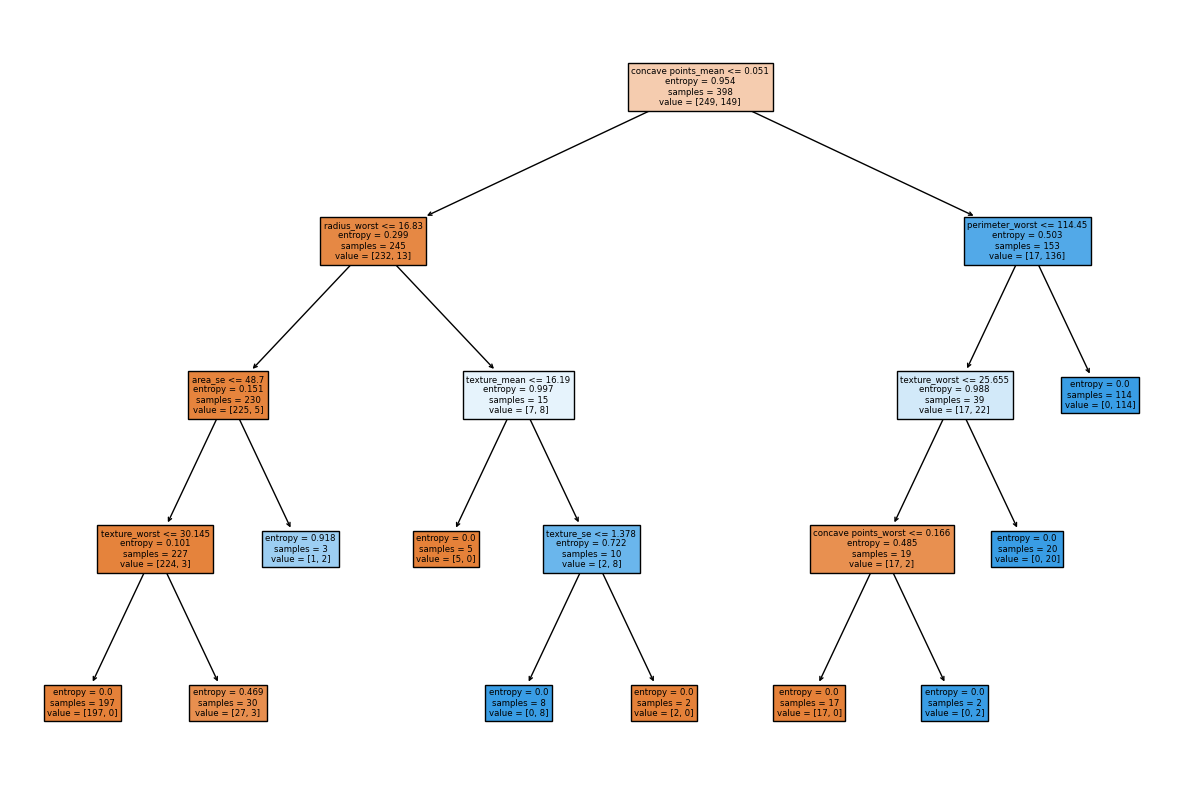

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True, feature_names = x.columns)

In [ ]:
#https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
pruning_path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain) # clf = DecisionTreeClassifier
ccp_alpha_values = pruning_path.ccp_alphas

In [ ]:
ccp_alpha_values

array([0.        , 0.0181389 , 0.01942863, 0.02249811, 0.02254598,
       0.02317526, 0.05933369, 0.07364967, 0.0966387 , 0.57628768])

In [ ]:
clfs_list = []  # save diffrent classifiers
for c in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=c)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)

In [ ]:
clfs_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01813889685646639, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.019428626961936996, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.022498112473096667, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0225459777507582, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.023175262447669234, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.059333693848085844, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.073649668769294, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.09663869999075987, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.5762876765620236, random_state=42)]

In [ ]:
train_scores = [ clf.score(xtrain, ytrain) for clf in clfs_list ]
test_scores = [ clf.score(xtest, ytest) for clf in clfs_list ]

In [ ]:
train_scores

[1.0,
 0.9422110552763819,
 0.9396984924623115,
 0.9396984924623115,
 0.9396984924623115,
 0.9396984924623115,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.6256281407035176]

In [ ]:
test_scores

[0.9415204678362573,
 0.9298245614035088,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.631578947368421]

In [ ]:
import matplotlib.pyplot as plt

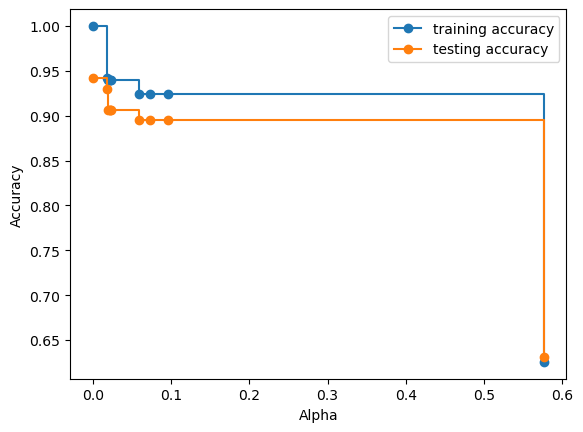

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()

In [ ]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [ ]:
pred=clf.predict(xtest)
accuracy_score(ytest, pred)

0.9649122807017544

[Text(0.4230769230769231, 0.9, 'concave points_mean <= 0.051\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.15384615384615385, 0.7, 'radius_worst <= 16.83\ngini = 0.1\nsamples = 245\nvalue = [232, 13]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.043\nsamples = 230\nvalue = [225, 5]'),
 Text(0.23076923076923078, 0.5, 'texture_mean <= 16.19\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.6923076923076923, 0.7, 'texture_worst <= 20.405\ngini = 0.198\nsamples = 153\nvalue = [17, 136]'),
 Text(0.5384615384615384, 0.5, 'radius_worst <= 18.145\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.5, 'area_worst <= 718.65\ngini = 0.096\nsamples = 139\n

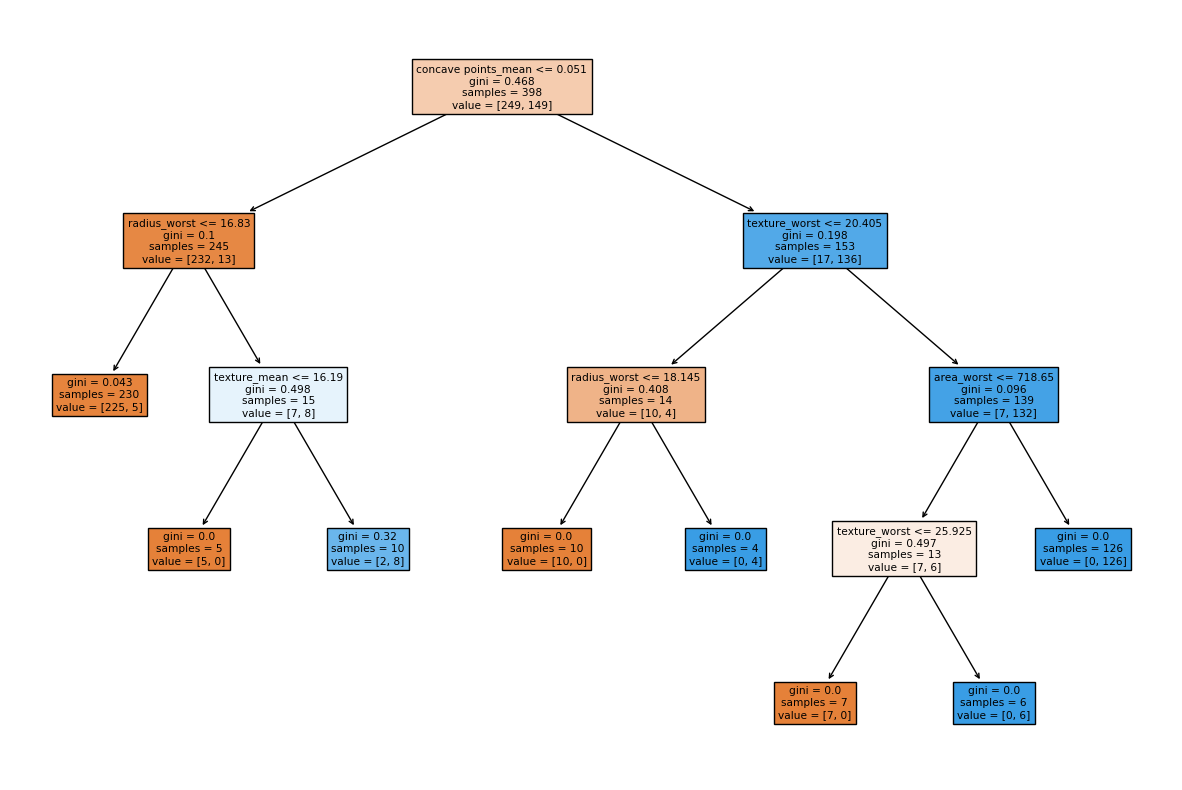

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names = x.columns)

# XGBoost

In [ ]:
#random & grid
#before performance & after performance

In [ ]:
#xtrain, xtest, ytrain, ytest

# ADA Boost

In [ ]:
#random & grid
#before performance & after performance